# Optimization (+AD)

## Table of contents
- [Optimization: With AD](#Optimization:-With-AD)
- [Optimization: With_AD + Div 30%](#Optimization:-With-AD-+-Div-30%)
- [Optimization: With_AD + Div 40%](#Optimization:-With-AD-+-Div-40%)

In [1]:
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import brightway2 as bw2
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import datetime
import os
import platform
from IPython.display import Image

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option("precision", 2)

### SwolfPy version used to produced the results:

In [2]:
pd.DataFrame({'Version': [sp.__version__, sppm.__version__, spid.__version__]},
             index=['swolfpy', 'swolfpy_processmodels', 'swolfpy_inputdata'])

,Version
swolfpy,0.2.4
swolfpy_processmodels,0.1.9
swolfpy_inputdata,0.2.4


### System info

In [3]:
pd.DataFrame({'info': [platform.platform(),
                       platform.processor(),
                       os.cpu_count()]},
             index=['Platform', 'Processor', 'CPU_count'])

,info
Platform,Windows-10-10.0.19041-SP0
Processor,"Intel64 Family 6 Model 158 Stepping 9, GenuineIntel"
CPU_count,8


## Setup

In [4]:
iter_mehtod = 'LHS' 
n_iter = 100
n_proc = os.cpu_count()

summary = f"""
********  Config *********
Time: {datetime.datetime.now().strftime("%Y-%m-%d & %H:%M:%S")}
Initial guess generation: {iter_mehtod}
N iter: {n_iter}
N proc: {n_proc}\n
"""
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()

## Create project

In [5]:
project_name = 'Optimization'
technosphere = sp.Technosphere(project_name)
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

In [6]:
# Treatment processes
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
# Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}


In [7]:
# Distance
Processes = ['LF', 'Composting', 'AD', 'SS_MRF', 'Reprocessing', 'SF', 'MF', 'COM']
# Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'SF', 'MF', 'COM']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=30)

distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,SS_MRF,Reprocessing,SF,MF,COM
LF,NaN,30.0,30.0,30.0,30.0,30.0,30.0,30.0
Composting,NaN,NaN,30.0,30.0,30.0,30.0,30.0,30.0
AD,NaN,NaN,NaN,30.0,30.0,30.0,30.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,30.0,30.0,30.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,30.0,30.0,30.0
SF,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0
MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Collection_processes:
Collection_processes = {}


SF_scheme = sppm.SF_Col.scheme()
SF_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
SF_scheme[('RWC', 'N/A', 'N/A')] = 0.5
Collection_processes['SF'] = {'input_type': [],
                              'model': sppm.SF_Col('SF', SF_scheme,
                              Treatment_processes=Treatment_processes,
                              Distance=distance)}

MF_scheme = sppm.MF_Col.scheme()
MF_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
MF_scheme[('RWC', 'N/A', 'N/A')] = 0.5
Collection_processes['MF'] = {'input_type': [],
                              'model': sppm.MF_Col('MF', MF_scheme,
                              Treatment_processes=Treatment_processes,
                              Distance=distance)}

COM_scheme = sppm.COM_Col.scheme()
COM_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
COM_scheme[('RWC', 'N/A', 'N/A')] = 0.5
Collection_processes['COM'] = {'input_type': [],
                               'model': sppm.COM_Col('COM', COM_scheme,
                               Treatment_processes=Treatment_processes,
                               Distance=distance)}


In [9]:
start = time()
demo = sp.Project(project_name, common_data, Treatment_processes, distance, Collection_processes, technosphere)
demo.init_project()
demo.write_project()
demo.group_exchanges()
print("Time for writing the project: {} second".format(round(time()-start)))

Biosphere database already present!!! No setup is needed
Vacuuming database 
Vacuuming database 
Vacuuming database 


Writing activities to SQLite3 database:



                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:05
  Finished: 12/20/2021 15:28:20
  Total time elapsed: 00:00:15
  CPU %: 49.40
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:21
  Finished: 12/20/2021 15:28:21
  Total time elapsed: 00:00:00
  CPU %: 151.20
  Memory %: 1.36

              ####
              ++++++ Initializing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:21
  Finished: 12/20/2021 15:28:21
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the AD
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:21
  Finished: 12/20/2021 15:28:21
  Total time elapsed: 00:00:00
  CPU %: 208.30
  Memory %: 1.36

              ####
              ++++++ Initializing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:22
  Finished: 12/20/2021 15:28:22
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:22
  Finished: 12/20/2021 15:28:22
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36

              ####
              ++++++ Initializing the SF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:22
  Finished: 12/20/2021 15:28:22
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.36

              ####
              ++++++ Initializing the MF
              

Writing activities to SQLite3 database:


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:22
  Finished: 12/20/2021 15:28:22
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36

              ####
              ++++++ Initializing the COM
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:22
  Finished: 12/20/2021 15:28:22
  Total time elapsed: 00:00:00
  CPU %: 208.30
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:22
  Finished: 12/20/2021 15:28:24
  Total time elapsed: 00:00:01
  CPU %: 48.30
  Memory %: 1.38

                  ####
                  ++++++ Writing the Composting_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:24
  Finished: 12/20/2021 15:28:24
  Total time elapsed: 00:00:00
  CPU %: 48.80
  Memory %: 1.39

              ####
              ++++++ Writing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:24
  Finished: 12/20/2021 15:28:24
  Total time elapsed: 00:00:00
  CPU %: 50.00
  Memory %: 1.39

                  ####
                  ++++++ Writing the AD_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:24
  Finished: 12/20/2021 15:28:24
  Total time elapsed: 00:00:00
  CPU %: 100.80
  Memory %: 1.39

              ####
              ++++++ Writing the AD
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:24
  Finished: 12/20/2021 15:28:25
  Total time elapsed: 00:00:00
  CPU %: 74.10
  Memory %: 1.39

                  ####
                  ++++++ Writing the SS_MRF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:25
  Finished: 12/20/2021 15:28:26
  Total time elapsed: 00:00:00
  CPU %: 54.90
  Memory %: 1.40


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:26
  Finished: 12/20/2021 15:28:27
  Total time elapsed: 00:00:00
  CPU %: 53.90
  Memory %: 1.42

              ####
              ++++++ Writing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:27
  Finished: 12/20/2021 15:28:27
  Total time elapsed: 00:00:00
  CPU %: 66.50
  Memory %: 1.42

                  ####
                  ++++++ Writing the SF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:27
  Finished: 12/20/2021 15:28:27
  Total time elapsed: 00:00:00
  CPU %: 87.50
  Memory %: 1.42


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:28
  Finished: 12/20/2021 15:28:28
  Total time elapsed: 00:00:00
  CPU %: 100.00
  Memory %: 1.43

                  ####
                  ++++++ Writing the MF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:29
  Finished: 12/20/2021 15:28:29
  Total time elapsed: 00:00:00
  CPU %: 69.70
  Memory %: 1.43


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the MF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:30
  Finished: 12/20/2021 15:28:30
  Total time elapsed: 00:00:00
  CPU %: 60.10
  Memory %: 1.44

                  ####
                  ++++++ Writing the COM_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:30
  Finished: 12/20/2021 15:28:30
  Total time elapsed: 00:00:00
  CPU %: 70.10
  Memory %: 1.44


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the COM
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/20/2021 15:28:31
  Finished: 12/20/2021 15:28:31
  Total time elapsed: 00:00:00
  CPU %: 60.10
  Memory %: 1.45

                  Grouping the exchanges with parameters in Database LF
                  

                  Grouping the exchanges with parameters in Database Composting
                  

                  Grouping the exchanges with parameters in Database AD
                  

                  Grouping the exchanges with parameters in Database SS_MRF
                  

                  Grouping the exchanges with parameters in Database Reprocessing
                  

                  Grouping the exchanges with parameters in Database SF
                  

                  Grouping the exchanges with parameters in Database MF
                  

                  Grouping the exchanges with parameters in Database COM
                  
Time for writing the project: 80 second


In [10]:
start = time()
demo.update_parameters(demo.parameters.default_parameters_list())
print("Time for updating the parameters: {} second".format(round(time()-start)))

Time for updating the parameters: 7 second


In [11]:
input_dict = {'SF':{}, 'MF':{}, 'COM':{}}

for key in common_data.Index:
    input_dict['SF'][key] = 1
    input_dict['MF'][key] = 1
    input_dict['COM'][key] = 1

demo.create_scenario(input_dict, 'Collection')

## Mass flows, impacts and costs based on default parameters

In [12]:
results = pd.DataFrame(columns=['Value', 'Unit'],
                       index=['Diversion', 'GWP', 'Operation Cost', 'Capital cost', 'Total cost',
                              'SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing'])

bw2.projects.set_current('Optimization')
Demand = {('waste', 'Collection'):1}
FU=bw2.get_activity(('waste', 'Collection'))
method = ('IPCC 2013', 'climate change', 'GWP 100a')
lca=bw2.LCA(Demand,method)
lca.lci()
lca.lcia()
results.loc['GWP',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), 'kg CO2/Mg']

lca.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Operation Cost',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']


lca.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Capital cost',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']

lca.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Total cost',:] = [lca.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']

for process in ['SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing']:
    results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(lca, process)), 'Mg/yr']

results.loc['Diversion',:] = [(1 - results['Value']['LF'] / float(FU.as_dict()['unit'].split(' ')[0])) * 100, '%']
results

,Value,Unit
Diversion,16.17,%
GWP,-254.64,kg CO2/Mg
Operation Cost,25.07,$/Mg
Capital cost,1.49,$/Mg
Total cost,26.56,$/Mg
SF,74826,Mg/yr
MF,74826,Mg/yr
COM,87511,Mg/yr
LF,198807,Mg/yr
WTE,0,Mg/yr


In [13]:
demo.parameters_list

[{'name': 'frac_of_SSO_from_SF_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_SF_to_AD', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_MF_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_MF_to_AD', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_COM_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_COM_to_AD', 'amount': 0.5}]

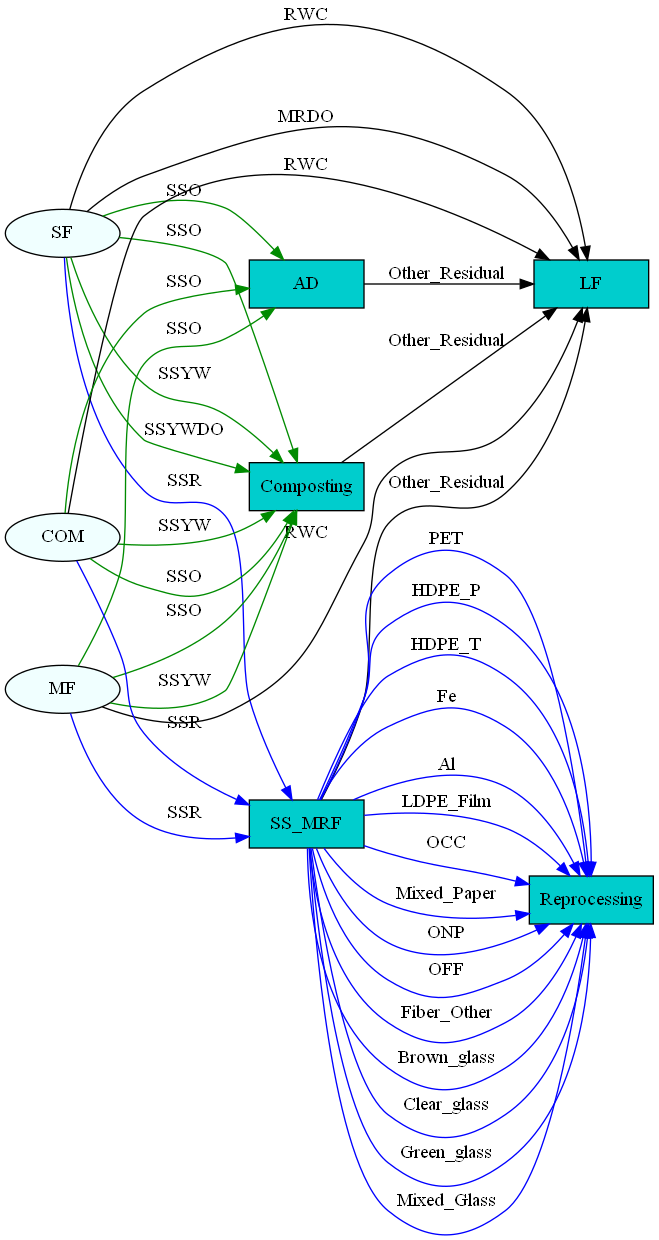

In [14]:
demo.parameters.SWM_network(show_vals=False, all_flow=False, filename='SWM_network_optimization')
Image(filename='SWM_network_optimization.gv.png', width=300)

In [15]:
# Functions used in reporting the optimization results
def Iterations_Performance(OptObject, FileName):
    objectives = []
    times = []
    for res in OptObject.all_results:
        if res:
            if res.success:
                objectives.append(res.fun * 10**OptObject.magnitude)
                times.append(res.time)
            else:
                objectives.append(None)
                times.append(res.time)
        else:
            objectives.append(None)
            times.append(None)

    DF = pd.DataFrame({'Objective': objectives, 'Time': times})
    DF['Ratio'] = DF['Objective'].fillna(0)/DF['Objective'].fillna(0).min()
    DF.to_csv(FileName)

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(15,9), sharex=True)

    DF['Objective'].plot(kind='bar', ax=ax1, color='b')
    ax1.set_ylabel(Opt.method[0][-1])

    DF['Ratio'].plot(kind='bar', ax=ax2, color='r')
    ax2.set_ylabel('Ratio to minimum')

    DF['Time'].plot(kind='bar', ax=ax3, color='g')
    ax3.set_ylabel("Time (sec)")
    ax3.set_xlabel('Iteration')
    
    if len(list(DF.index)) > 20:
        ax3.set_xticks(list(DF.index[::5]))
        ax3.set_xticklabels(list(DF.index)[::5])
    
    return DF

def report_res(Opt, FU, fileName):
    results = pd.DataFrame(columns=['Value', 'Unit'],
                           index=['Diversion', 'GWP', 'Operation Cost', 'Capital cost', 'Total cost',
                                  'SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing'])
    Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
    Opt.lcia()
    results.loc['GWP',:] = [Opt.score/float(FU.as_dict()['unit'].split(' ')[0]), 'kg CO2/Mg']

    Opt.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Operation Cost',:] = [Opt.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']


    Opt.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Capital cost',:] = [Opt.score/float(FU.as_dict()['unit'].split(' ')[0]), '$/Mg']

    Opt.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Total cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    for process in ['SF', 'MF', 'COM', 'LF', 'WTE', 'Composting', 'AD', 'SS_MRF', 'Reprocessing']:
        results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(Opt, process)), 'Mg/yr']

    results.loc['Diversion',:] = [(1 - results['Value']['LF'] / float(FU.as_dict()['unit'].split(' ')[0]))*100, '%']
    results.to_csv(fileName)
    return(results)

# Optimization: With AD

In [16]:
scenario_name = 'With_AD'
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')], demo)
config=Opt.config(demo)
config.iloc[6:, [1, 3, 5]] = 'Fix'
Opt.set_config(config)
config

,SF,SF mode,MF,MF mode,COM,COM mode
"(RWC, N/A, N/A)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, N/A, SSR)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, SSR)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, SSO, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSO, SSR)",0,Optimize,0,Optimize,0,Optimize
"(REC_WetRes, N/A, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSYW, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSO, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(ORG_DryRes, ORG_DryRes, N/A)",0,Fix,0,Fix,0,Fix


In [17]:
constraints = {}
start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, nproc=n_proc, timeout=1000, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -108367667.7090573
                      Global min: -108367667.7090573 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -108367667.7090569
                      Global min: -108367667.7090573 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -108367667.7090501
                      Global min: -108367667.7090573 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -108367667.70904633
                      Global min: -108367667.

Time for Optimization: 2161 second


### Performance of iterations

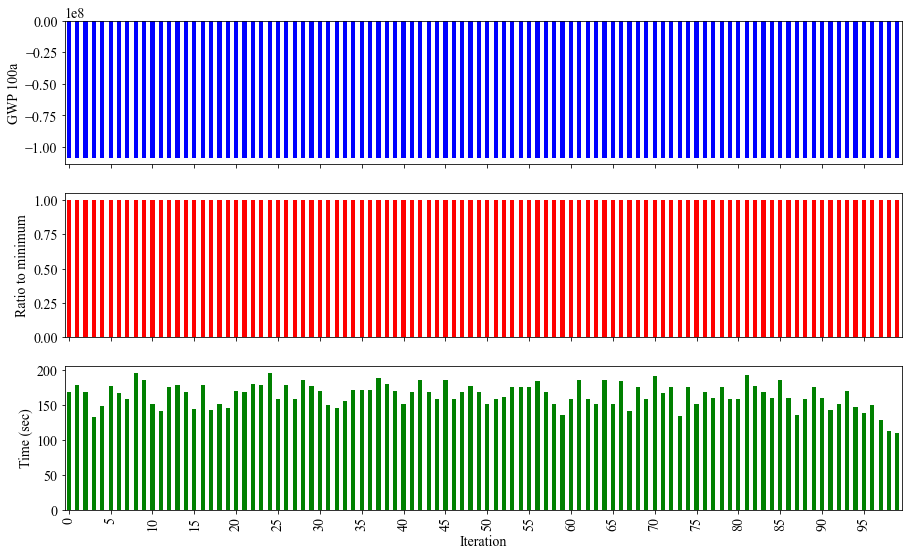

In [18]:
DF = Iterations_Performance(Opt, f'{scenario_name}_Iterations.csv')

## Mass flows, impacts and costs

In [19]:
report_res(Opt, FU, f'{scenario_name}.csv')

,Value,Unit
Diversion,27.1,%
GWP,-456.94,kg CO2/Mg
Operation Cost,2.46,$/Mg
Capital cost,4.5,$/Mg
Total cost,6.96,$/Mg
SF,74826,Mg/yr
MF,74826,Mg/yr
COM,87511,Mg/yr
LF,172890,Mg/yr
WTE,0,Mg/yr


In [20]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName=f'{scenario_name}.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'SS_MRF', 'Reprocessing', 'SF', 'MF', 'COM']
              source = [5, 5, 6, 6, 7, 7, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7]
              target = [1, 2, 1, 2, 1, 2, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 1, 0, 1, 0, 3, 1, 0, 3, 1]
              label_link = ['SSO', 'SSO', 'SSO', 'SSO', 'SSO', 'SSO', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'RWC', 'SSR', 'SSYW', 'MRDO', 'SSYWDO', 'RWC', 'SSR', 'SSYW', 'RWC', 'SSR', 'SSYW']
              value = [0.0, 0.0, 0.0, 0.0, 0.0, 9293.661, 0.0, 510.407, 8082.741, 1025.354, 17978.614, 19851.273, 0.0, 0.0, 0.0, 1246.314, 706.159, 657.041, 0.0, 3870.543, 293.316, 2694.616, 6087.771, 1077.779, 56470.103, 18355.458, 0.0, 0.0,

In [21]:
Opt.optimized_x

[{'name': 'frac_of_SSO_from_SF_to_Composting', 'amount': 0.4445},
 {'name': 'frac_of_SSO_from_SF_to_AD', 'amount': 0.5555},
 {'name': 'frac_of_SSO_from_MF_to_Composting', 'amount': 0.3374},
 {'name': 'frac_of_SSO_from_MF_to_AD', 'amount': 0.6626},
 {'name': 'frac_of_SSO_from_COM_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_COM_to_AD', 'amount': 1.0},
 {'name': ('SF', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('SF', ('RWC', 'SSYW', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSYW', 'SSR')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSO', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSO', 'SSR')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('MF', ('RWC', 'SSYW', 'N/A')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'SSYW', 'SSR')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'SSO', 'N/A')), 'amount': 0.0},
 

In [22]:
summary = f"""\n
********  {scenario_name} - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'SF': [6, 7, 8, 9, 10, 11], 'MF': [12, 13, 14, 15, 16, 17], 'COM': [18, 19, 20, 21, 22, 23]} 




********  With_AD - Summary *********
Number of decision variables: 24
Number of constraints: 6
Total time: 0:36:01
Average time per iteration: 0:02:44
Successful iterations: 100
Number of best iterations: 100
Number of >95 iterations: 100




# Optimization: With AD + Div 30%

In [23]:
scenario_name = 'With_AD_Div30'
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')], demo)
config=Opt.config(demo)
config.iloc[6:, [1, 3, 5]] = 'Fix'
Opt.set_config(config)
config

,SF,SF mode,MF,MF mode,COM,COM mode
"(RWC, N/A, N/A)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, N/A, SSR)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, SSR)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, SSO, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSO, SSR)",0,Optimize,0,Optimize,0,Optimize
"(REC_WetRes, N/A, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSYW, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSO, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(ORG_DryRes, ORG_DryRes, N/A)",0,Fix,0,Fix,0,Fix


In [24]:
constraints = {}
constraints['LF'] = {'limit':float(FU.as_dict()['unit'].split(' ')[0]) * 0.7, 'KeyType':'Process','ConstType':"<="}

start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, nproc=n_proc, timeout=1000, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -107593418.93780746
                      Global min: -107593418.93780746 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -107593418.93816882
                      Global min: -107593418.93816882 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -107593418.93838732
                      Global min: -107593418.93838732 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -107593418.93828714
                      Global min: -1075

Time for Optimization: 5085 second


### Performance of iterations

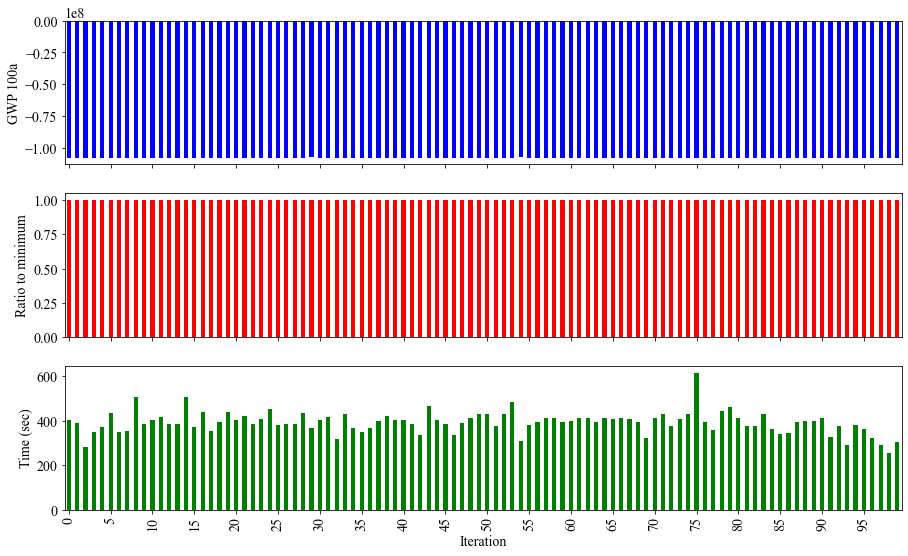

In [25]:
DF = Iterations_Performance(Opt, f'{scenario_name}_Iterations.csv')

## Mass flows, impacts and costs

In [26]:
report_res(Opt, FU, f'{scenario_name}.csv')

,Value,Unit
Diversion,30.0,%
GWP,-453.67,kg CO2/Mg
Operation Cost,3.13,$/Mg
Capital cost,5.95,$/Mg
Total cost,9.08,$/Mg
SF,74826,Mg/yr
MF,74826,Mg/yr
COM,87511,Mg/yr
LF,166014,Mg/yr
WTE,0,Mg/yr


In [27]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName=f'{scenario_name}.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'SS_MRF', 'Reprocessing', 'SF', 'MF', 'COM']
              source = [5, 5, 6, 6, 7, 7, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7]
              target = [1, 2, 1, 2, 1, 2, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 1, 0, 1, 0, 3, 1, 0, 3, 1]
              label_link = ['SSO', 'SSO', 'SSO', 'SSO', 'SSO', 'SSO', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'RWC', 'SSR', 'SSYW', 'MRDO', 'SSYWDO', 'RWC', 'SSR', 'SSYW', 'RWC', 'SSR', 'SSYW']
              value = [0.0, 0.0, 0.0, 7312.125, 0.0, 9293.661, 0.0, 946.275, 8082.741, 1025.354, 17978.614, 19851.273, 0.0, 0.0, 0.0, 1246.314, 706.159, 657.041, 0.0, 3870.543, 293.316, 2694.616, 6087.771, 1077.779, 56470.103, 18355.458, 0.0,

In [28]:
Opt.optimized_x

[{'name': 'frac_of_SSO_from_SF_to_Composting', 'amount': 0.3584},
 {'name': 'frac_of_SSO_from_SF_to_AD', 'amount': 0.6416},
 {'name': 'frac_of_SSO_from_MF_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_MF_to_AD', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_COM_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_COM_to_AD', 'amount': 1.0},
 {'name': ('SF', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('SF', ('RWC', 'SSYW', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSYW', 'SSR')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSO', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSO', 'SSR')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'N/A', 'SSR')), 'amount': 0.5607},
 {'name': ('MF', ('RWC', 'SSYW', 'N/A')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'SSYW', 'SSR')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'SSO', 'N/A')), 'amount': 0.0},
 {'n

In [29]:
summary = f"""\n
********  {scenario_name} - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'SF': [6, 7, 8, 9, 10, 11], 'MF': [12, 13, 14, 15, 16, 17], 'COM': [18, 19, 20, 21, 22, 23]} 




********  With_AD_Div30 - Summary *********
Number of decision variables: 24
Number of constraints: 7
Total time: 1:24:45
Average time per iteration: 0:06:32
Successful iterations: 100
Number of best iterations: 100
Number of >95 iterations: 100




# Optimization: With AD + Div 40%

In [30]:
scenario_name = 'With_AD_Div40'
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')], demo)
config=Opt.config(demo)
config.iloc[6:, [1, 3, 5]] = 'Fix'
Opt.set_config(config)
config

,SF,SF mode,MF,MF mode,COM,COM mode
"(RWC, N/A, N/A)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, N/A, SSR)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSYW, SSR)",0.5,Optimize,0.5,Optimize,0.5,Optimize
"(RWC, SSO, N/A)",0,Optimize,0,Optimize,0,Optimize
"(RWC, SSO, SSR)",0,Optimize,0,Optimize,0,Optimize
"(REC_WetRes, N/A, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSYW, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(REC_WetRes, SSO, REC_WetRes)",0,Fix,0,Fix,0,Fix
"(ORG_DryRes, ORG_DryRes, N/A)",0,Fix,0,Fix,0,Fix


In [31]:
constraints = {}
constraints['LF'] = {'limit':float(FU.as_dict()['unit'].split(' ')[0]) * 0.6, 'KeyType':'Process','ConstType':"<="}

start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, nproc=n_proc, timeout=1500, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results = Opt.all_results



                      Iteration: 0
                      Status: False, Message: Positive directional derivative for linesearch
                      Objective function: -98657704.98611644
                      Global min: 1e+108 

                      


                      Iteration: 1
                      Status: False, Message: Positive directional derivative for linesearch
                      Objective function: -99065091.18083265
                      Global min: 1e+108 

                      


                      Iteration: 2
                      Status: False, Message: Positive directional derivative for linesearch
                      Objective function: -98710147.06924447
                      Global min: 1e+108 

                      


                      Iteration: 3
                      Status: False, Message: Positive directional derivative for linesearch
                      Objective function: -95091574.26382507
                      Global min: 1e+1

Time for Optimization: 11509 second


### Performance of iterations

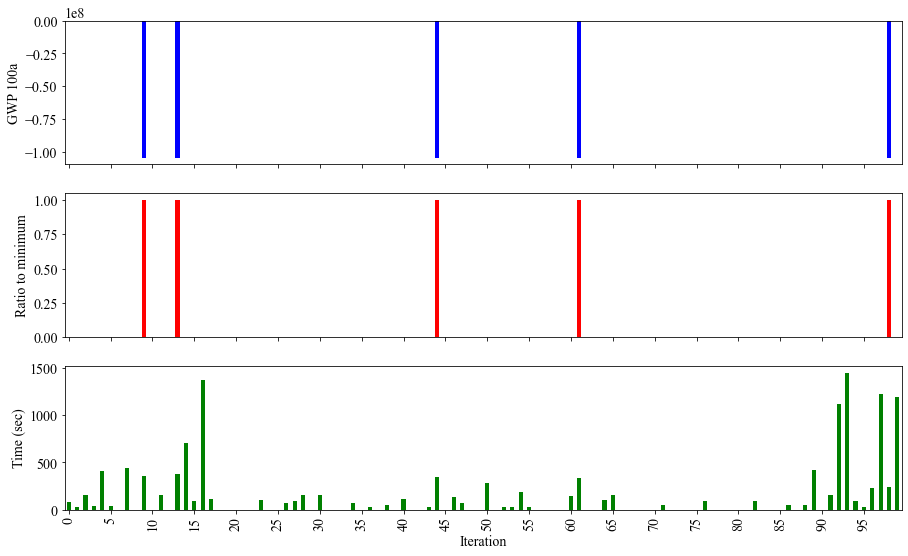

In [32]:
DF = Iterations_Performance(Opt, f'{scenario_name}_Iterations.csv')

## Mass flows, impacts and costs

In [33]:
report_res(Opt, FU, f'{scenario_name}.csv')

,Value,Unit
Diversion,40.0,%
GWP,-440.12,kg CO2/Mg
Operation Cost,9.76,$/Mg
Capital cost,10.96,$/Mg
Total cost,20.72,$/Mg
SF,74826,Mg/yr
MF,74826,Mg/yr
COM,87511,Mg/yr
LF,142297,Mg/yr
WTE,0,Mg/yr


In [34]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName=f'{scenario_name}.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'SS_MRF', 'Reprocessing', 'SF', 'MF', 'COM']
              source = [5, 5, 6, 6, 7, 7, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7]
              target = [1, 2, 1, 2, 1, 2, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 1, 0, 1, 0, 3, 1, 0, 3, 1]
              label_link = ['SSO', 'SSO', 'SSO', 'SSO', 'SSO', 'SSO', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'RWC', 'SSR', 'SSYW', 'MRDO', 'SSYWDO', 'RWC', 'SSR', 'SSYW', 'RWC', 'SSR', 'SSYW']
              value = [0.0, 15887.601, 0.0, 16644.946, 0.0, 9293.661, 0.0, 2449.637, 8082.741, 1025.354, 17978.614, 19851.273, 0.0, 0.0, 0.0, 1246.314, 706.159, 657.041, 0.0, 3870.543, 293.316, 2694.616, 6087.771, 1077.779, 40582.502, 18355.4

In [35]:
Opt.optimized_x

[{'name': 'frac_of_SSO_from_SF_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_SF_to_AD', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_MF_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_MF_to_AD', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_COM_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_COM_to_AD', 'amount': 1.0},
 {'name': ('SF', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'N/A', 'SSR')), 'amount': 0.0455},
 {'name': ('SF', ('RWC', 'SSYW', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSYW', 'SSR')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSO', 'N/A')), 'amount': 0.0},
 {'name': ('SF', ('RWC', 'SSO', 'SSR')), 'amount': 0.9545},
 {'name': ('MF', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'N/A', 'SSR')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'SSYW', 'N/A')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'SSYW', 'SSR')), 'amount': 0.0},
 {'name': ('MF', ('RWC', 'SSO', 'N/A')), 'amount': 0.0},
 {'name

In [36]:
summary = f"""\n
********  {scenario_name} - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'SF': [6, 7, 8, 9, 10, 11], 'MF': [12, 13, 14, 15, 16, 17], 'COM': [18, 19, 20, 21, 22, 23]} 




********  With_AD_Div40 - Summary *********
Number of decision variables: 24
Number of constraints: 7
Total time: 3:11:49
Average time per iteration: 0:04:27
Successful iterations: 5
Number of best iterations: 5
Number of >95 iterations: 5


